<a href="https://colab.research.google.com/github/socome/ML_study/blob/master/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 172.959581601
Epoch: 0002 cost = 42.318191937
Epoch: 0003 cost = 26.481703355
Epoch: 0004 cost = 18.323571327
Epoch: 0005 cost = 13.265157352
Epoch: 0006 cost = 9.824268700
Epoch: 0007 cost = 7.263321922
Epoch: 0008 cost = 5.576887810
Epoch: 0009 cost = 4.144061087
Epoch: 0010 cost = 3.079040740
Epoch: 0011 cost = 2.199755703
Epoch: 0012 cost = 1.707605658
Epoch: 0013 cost = 1.256858213
Epoch: 0014 cost = 1.015668889
Epoch: 0015 cost = 0.740832256
Learning finished
Accuracy:  0.944
Label:  [9]
Prediction:  [5]


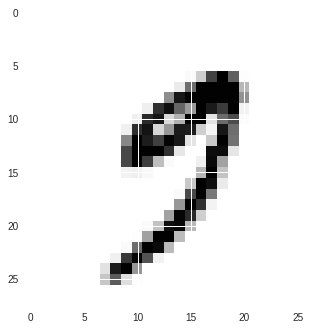

In [10]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) +b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) +b2)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))

# Hypothesis (using softmax)
hypothesis = tf.matmul(L2, W3) + b3
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
# parameters
training_epochs = 15
batch_size = 100
 
with tf.Session() as sess:      
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
 
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
      avg_cost += c / total_batch
 
    print('Epoch:', '%04d' % (epoch + 1),'cost =', '{:.9f}'.format(avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
           X: mnist.test.images, Y: mnist.test.labels}))
 
  # Get one and predict
  r = np.random.randint(0, mnist.test.num_examples - 1)
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
  print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
    
  plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28),
    cmap='Greys',
    interpolation='nearest')
  plt.show()